# Project: Diamond Price Regretion Problem

## 1. Description

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

## 2. Bookstores

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path


In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)
print('Seaborn', sns.__version__)

NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.8.0
Scikit-learn 1.2.2
Seaborn 0.12.2


## 3. DataSet

### 3.1. Dataset load

https://www.kaggle.com/datasets/shivam2503/diamonds/data

In [4]:
os.listdir("data/")

['data.csv']

In [5]:
data_file = Path.cwd().resolve()/"Data"/"data.csv"
df_raw = pd.read_csv(data_file)
df_raw.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3.2. Descritaset

In [6]:
##  Size
df_raw.shape

(53940, 11)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
df_processed = df_raw

change the name of the target variable

In [9]:
df_processed = df_processed.rename(columns={"price":"target"})
df_processed.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 4. Data cleaning

### 4.1. Null handling

In [10]:
df_processed.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
target        0
x             0
y             0
z             0
dtype: int64

### 4.2. Remove Nulls

In [11]:
df_processed.dropna(inplace=True)

### 4.3. Delete Data

#### Delete unnecessary columns

In [12]:
df_processed.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'target', 'x', 'y', 'z'],
      dtype='object')

In [928]:
df_processed.drop({}, axis=1, inplace=True)
df_processed.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 5. Exploratory data analysis

### 5.1. Data Analysis

Descriptive statistics variable numerical

In [929]:
print(df_processed.describe(),'\n')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 



Descriptive statistics variable object

In [930]:
print(df_processed.describe(include="object"),'\n')

        target
count      150
unique       3
top     setosa
freq        50 



Group by Target

In [931]:
print(df_processed.groupby('target').size())

target
setosa        50
versicolor    50
virginica     50
dtype: int64


### 5.2. Graphics

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 500x500 with 0 Axes>

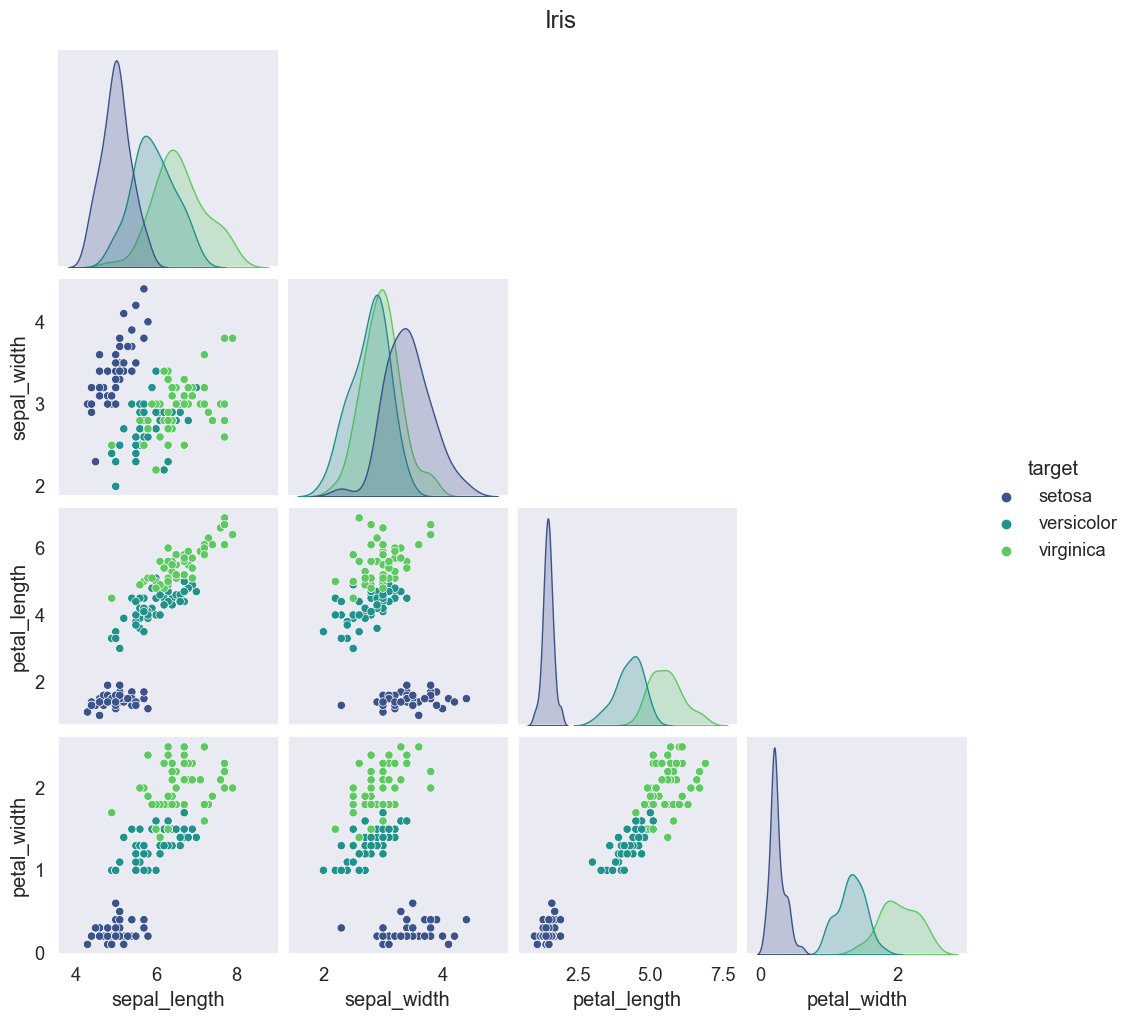

In [932]:
fig0 = plt.figure(figsize=(5,5))
sns.set(style="dark", font_scale=1.2)
fig = sns.pairplot(data=df_processed, hue='target', palette='viridis', corner=True)
fig.fig.suptitle('Iris', y=1.02)
plt.show()

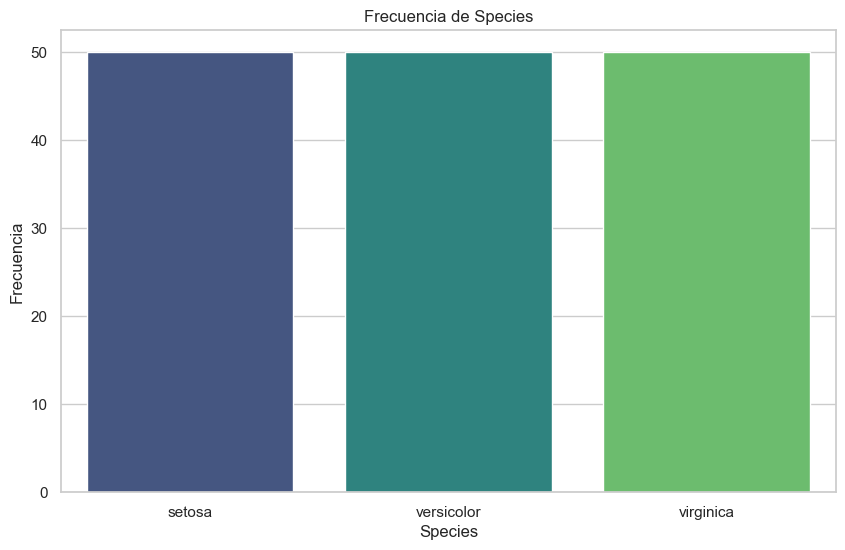

In [933]:
fig1=plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_processed, x='target', palette='viridis')
plt.title('Frecuencia de Species')
plt.xlabel('Species')
plt.ylabel('Frecuencia')
plt.show()

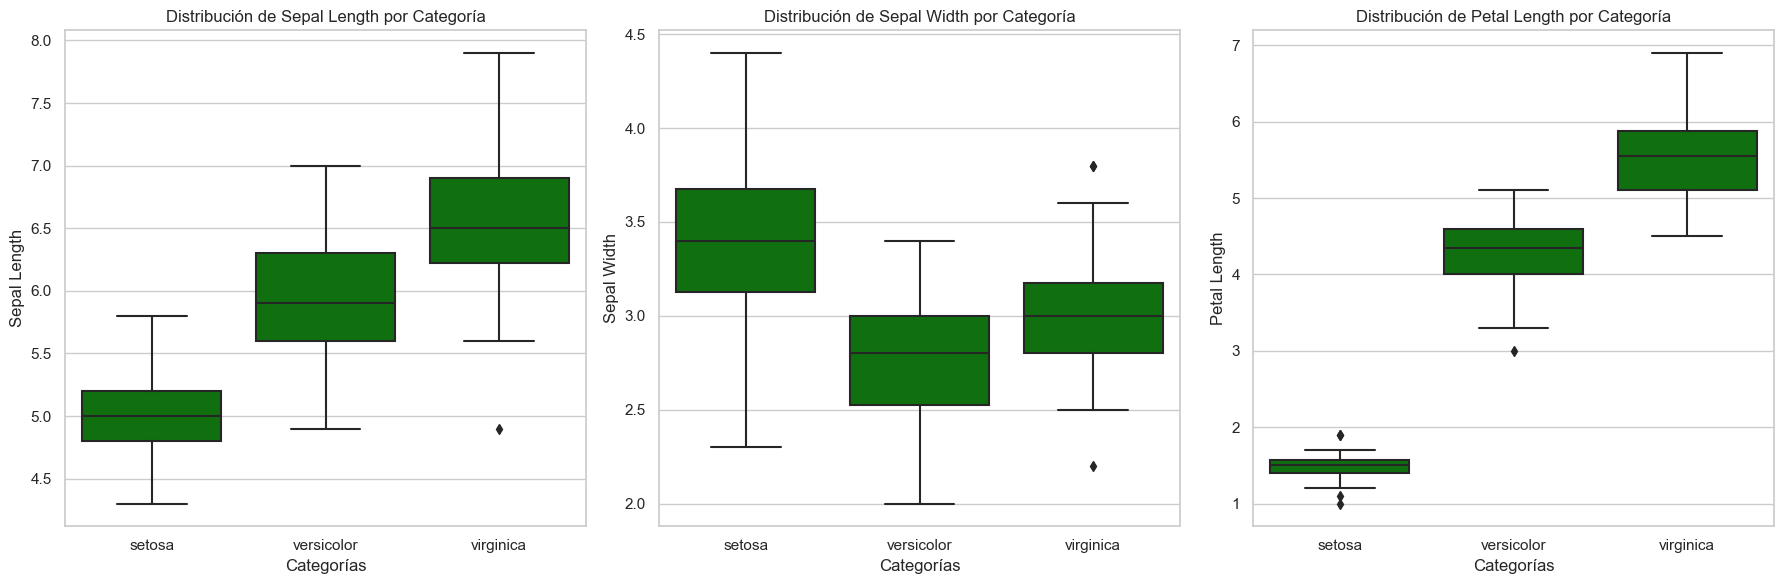

In [934]:
fig2=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.boxplot(data=df_processed, x='target', y='sepal_length', color='green', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.boxplot(data=df_processed, x='target', y='sepal_width', color='green', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.boxplot(data=df_processed, x='target', y='petal_length', color='green', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


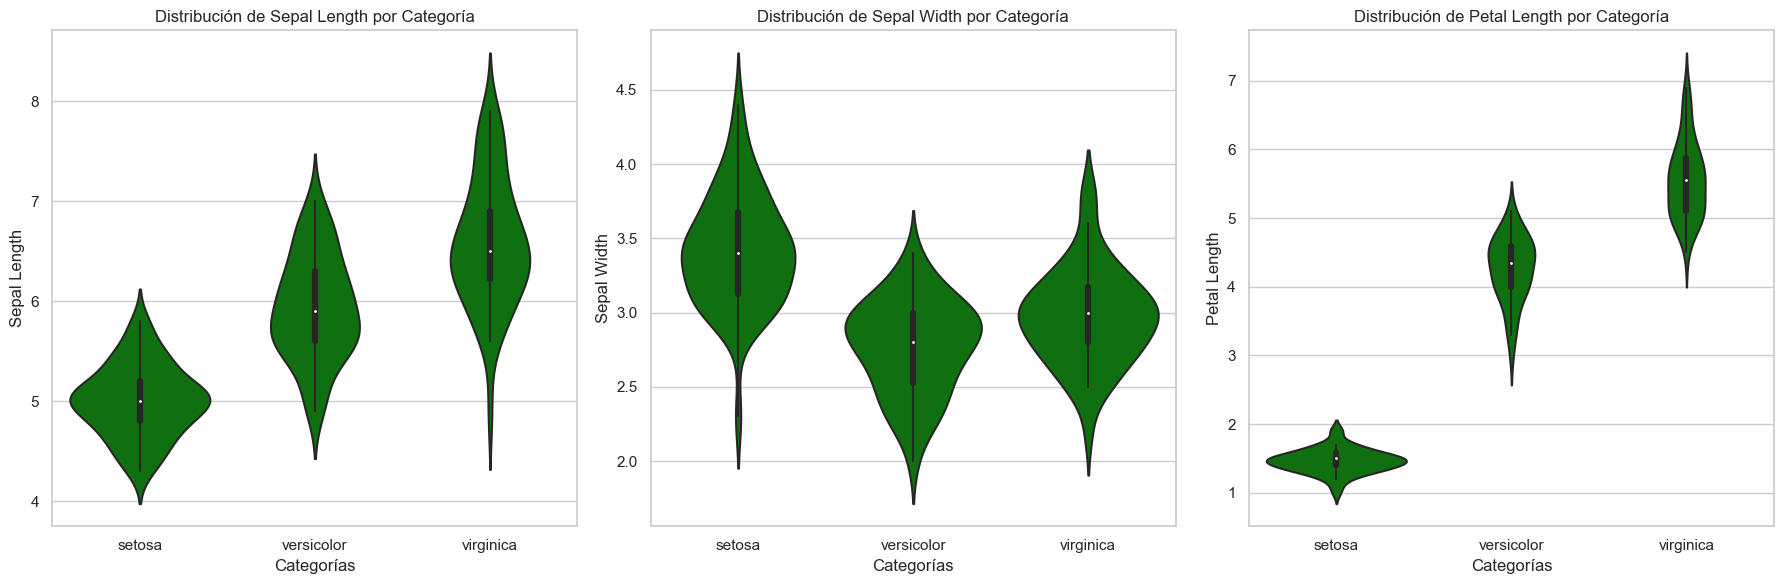

In [935]:
fig3=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.violinplot(data=df_processed, x='target', y='sepal_length', color='green', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.violinplot(data=df_processed, x='target', y='sepal_width', color='green', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.violinplot(data=df_processed, x='target', y='petal_length', color='green', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

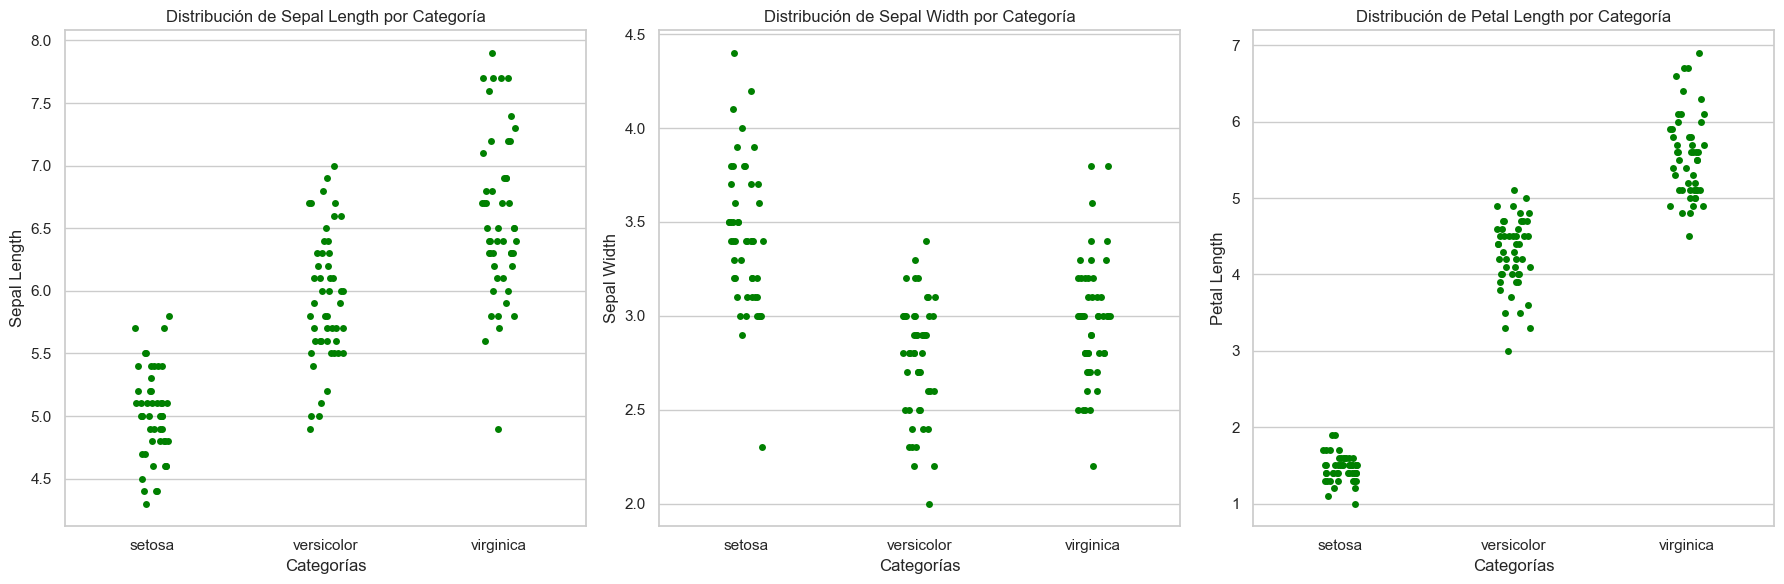

In [936]:
fig4=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.stripplot(data=df_processed, x='target', y='sepal_length', color='green', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.stripplot(data=df_processed, x='target', y='sepal_width', color='green', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.stripplot(data=df_processed, x='target', y='petal_length', color='green', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

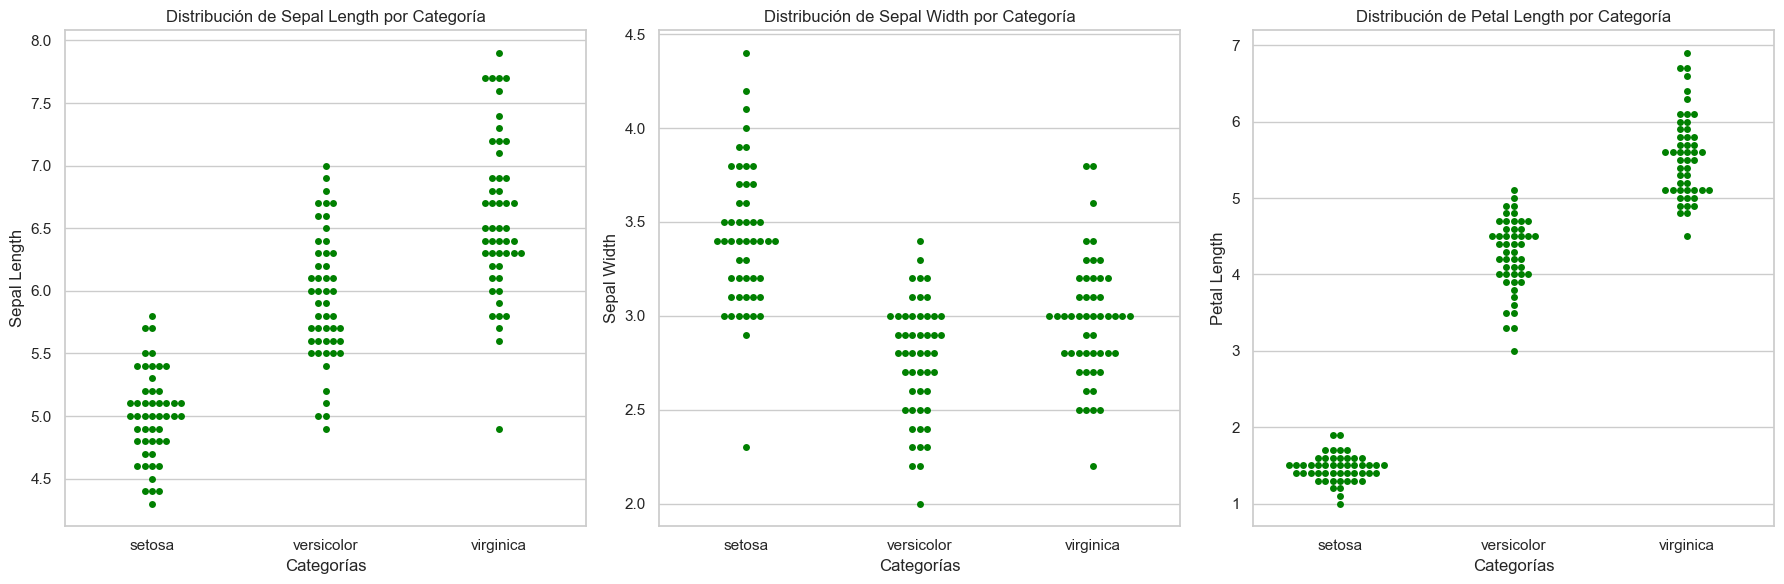

In [937]:
fig5=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.swarmplot(data=df_processed, x='target', y='sepal_length', color='green', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.swarmplot(data=df_processed, x='target', y='sepal_width', color='green', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.swarmplot(data=df_processed, x='target', y='petal_length', color='green', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


## 6. Modeling

### 6.1. Partitioning the dataset into test and training

In [938]:
X = df_processed.drop(columns = ['target'])
y = df_processed['target']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


In [939]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [940]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

### 6.2. Data separation

In [941]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.3,
    random_state =4,
    stratify=y
)

In [942]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (105, 4)
Dimensiones de y de entrenamiento: (105,)

Dimensiones de X de prueba: (45, 4)
Dimensiones de y de prueba: (45,)


In [943]:
category_counts = y_train.value_counts()
print(category_counts)

target
virginica     35
setosa        35
versicolor    35
Name: count, dtype: int64


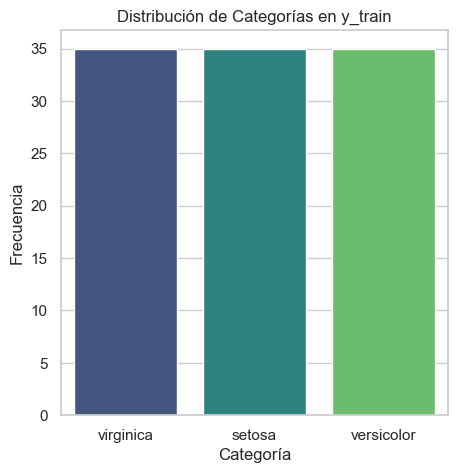

In [944]:
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']
fig7=plt.figure(figsize=(5, 5))
sns.barplot(x='Category', y='Count', data=category_counts_df, palette='viridis')
plt.title('Distribución de Categorías en y_train')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

#### Scaler data

In [945]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Classification algorithm

### 7.1. KNN K-Neighbors Near

In [946]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#### 7.1.1. Training

In [947]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### 7.1.2. Model evaluation

In [948]:
y_predicted = model_KNN.predict(X_test_scaled)
y_predicted

array(['setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [949]:
comparation=y_test==y_predicted
df_verification_KKN = pd.DataFrame({"Real Data":y_test, "Predict Data":y_predicted, "Comparation":comparation})
df_verification_KKN.head()

,Real Data,Predict Data,Comparation
23,setosa,setosa,True
59,versicolor,versicolor,True
138,virginica,virginica,True
68,versicolor,virginica,False
36,setosa,setosa,True


#### 7.1.3. Accuracy

In [950]:
from  sklearn.metrics import accuracy_score
acc_KNN = accuracy_score(y_test, y_predicted)
print("The accuracy of the model on test data is " + str(round(acc_KNN * 100, 1)) + "%")
y_predicted_2 = model_KNN.predict(X_train_scaled)
acc_KNN_2 = accuracy_score(y_train, y_predicted_2)
print("The accuracy of the model on train data is " + str(round(acc_KNN_2 * 100, 1)) + "%")


The accuracy of the model on test data is 93.3%
The accuracy of the model on train data is 97.1%


### 7.2. Decisions Tree

In [951]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

#### 7.2.1. Look of Deep

In [966]:
# Definir el rango de profundidades del árbol de decisión
depth_range = range(1, 10)
acc_test = []
acc_train = []

# Iterar sobre el rango de profundidades
for depth in depth_range:
    # Inicializar el clasificador con la profundidad actual
    model = DecisionTreeClassifier(random_state=0, max_depth=depth)
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir y calcular precisión para el conjunto de prueba y entrenamiento
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calcular la métrica de precisión
    acc_test.append(accuracy_score(y_test, y_pred_test))
    acc_train.append(accuracy_score(y_train, y_pred_train))

# Imprimir los resultados
print("Depths:", list(depth_range))
print("Test Accuracy:", acc_test)
print("Train Accuracy:", acc_train)


Depths: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Test Accuracy: [0.6666666666666666, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
Train Accuracy: [0.6666666666666666, 0.9619047619047619, 0.9809523809523809, 0.9904761904761905, 1.0, 1.0, 1.0, 1.0, 1.0]


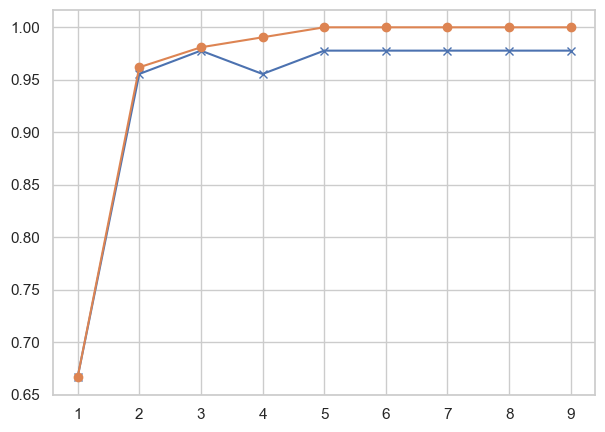

In [953]:
fig9=plt.figure(figsize=(7, 5))
plt.plot(deep,acc_test,marker="x")
plt.plot(deep,acc_train, marker="o")

#### 7.2.2. Training

In [954]:
Model_tree = DecisionTreeClassifier(
    max_depth=3,
    random_state=45,
    max_leaf_nodes=3
)
Model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=45)

#### 7.2.3. Model Evaluation

In [955]:
y_predicted_tree = Model_tree.predict(X_test)
y_predicted_tree

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [956]:
comparation=y_test==y_predicted_tree
df_verification_tree = pd.DataFrame({"Real Data":y_test, "Predict Data":y_predicted_tree, "Comparation":comparation})
df_verification_tree.head()

,Real Data,Predict Data,Comparation
23,setosa,setosa,True
59,versicolor,versicolor,True
138,virginica,virginica,True
68,versicolor,versicolor,True
36,setosa,setosa,True


#### 7.2.4. Accuracy

In [967]:
acc_Tree = accuracy_score(y_test, y_predicted_tree)
print("The accuracy of the model on test data is " + str(round(acc_Tree * 100, 1)) + "%")
y_Tree_Predic_2 = Model_tree.predict(X_train)
acc_Tree_2 = accuracy_score(y_train, y_Tree_Predic_2)
print("The accuracy of the model on train data is " + str(round(acc_Tree_2 * 100, 1)) + "%")

The accuracy of the model on test data is 95.6%
The accuracy of the model on train data is 96.2%


#### 7.2.5. Feature Importances

In [958]:
Model_tree.get_depth()

2

In [959]:
Model_tree.feature_importances_

array([0.        , 0.        , 0.55957837, 0.44042163])

In [960]:
Model_tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

Text(0, 0.5, 'Value feature importances')

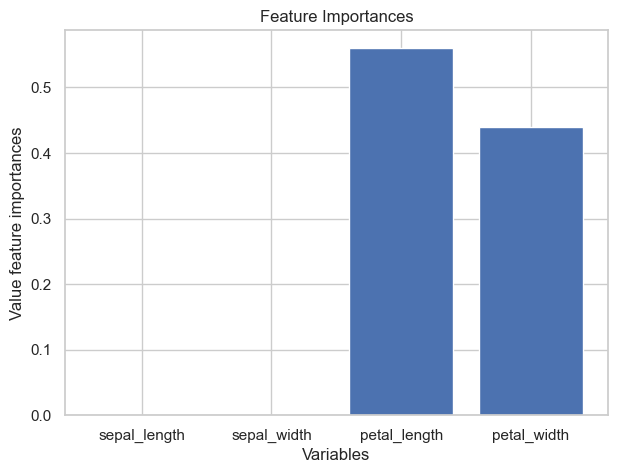

In [961]:
fig8=plt.figure(figsize=(7, 5))
plt.bar(x=Model_tree.feature_names_in_, height=Model_tree.feature_importances_)
plt.title("Feature Importances")
plt.xlabel('Variables')
plt.ylabel('Value feature importances')

In [962]:
Model_tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [963]:
from sklearn.tree import export_graphviz

export_graphviz(Model_tree,
                out_file="tree.dot",
                class_names= Model_tree.classes_,
                feature_names= Model_tree.feature_names_in_,
                impurity=False,
                filled=True)

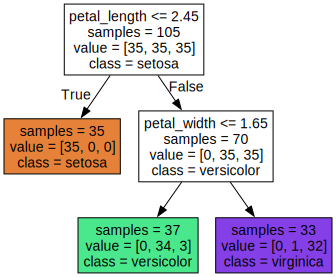

In [964]:
import graphviz
with open("tree.dot") as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))